In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import requests
from lxml import html

import scipy.interpolate as interp

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (8,6)

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcm')
mpl.rcParams['axes.prop_cycle'] = cycler('color', \
                                         ['#1f77b4', '#ff7f0e', '#2ca02c', \
                                          '#d62728', '#9467bd', \
                                          (0.2,0.8,1.), '#bcbd22', '#17becf'])


## Code for scraping data from the TENDL web page (no longer used)

In [4]:
# page = requests.get('https://tendl.web.psi.ch/tendl_2019/he3_file/Xe/Xe136/'+\
#                     'tables/xs/xs000100.tot')


# tree = html.fromstring(page.content)

# print(page.text)

# for line in page.text.split('\n'):
#     print(line)


In [4]:
h_residual_path = 'https://tendl.web.psi.ch/tendl_2019/he3_file/Xe/Xe136/tables/residual/'
p_residual_path = 'https://tendl.web.psi.ch/tendl_2019/proton_file/Xe/Xe136/tables/residual/'



# Proton-on-$^{136}$Xe neutron production cross sections

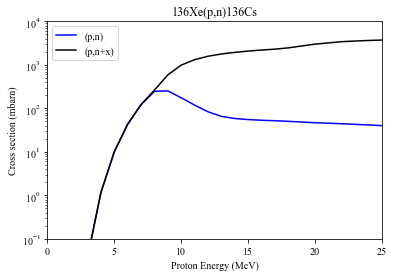

In [5]:
xe136_pn_xsec = np.genfromtxt('xsec_data/Xe136_pn_xsec.txt',skip_header=5)
xe136_pnx_xsec = np.genfromtxt('xsec_data/Xe136_pnx_xsec.txt',skip_header=5)
xe136_pgx_xsec = np.genfromtxt('xsec_data/Xe136_pgx_xsec.txt',skip_header=5)
plt.plot(xe136_pn_xsec[:,0],xe136_pn_xsec[:,1],'-b',label='(p,n)')
plt.plot(xe136_pnx_xsec[:,0],xe136_pnx_xsec[:,1],'-k',label='(p,n+x)')
#plt.plot(xe136_pgx_xsec[:,0],xe136_pgx_xsec[:,1],'-g',label='(p,g+x)')
plt.yscale('log')
plt.ylim(1.e-1,1.e4)
plt.xlim(0.,25.)
plt.ylabel('Cross section (mbarn)')
plt.xlabel('Proton Energy (MeV)')
plt.title('136Xe(p,n)136Cs')
plt.legend()


In [6]:
import time

def get_tendl_residuals_data( path, Astart, Aend, Zstart, Zend ):
    start_time = time.time()
    
    output_dict = dict()
    
    for A in range(Astart,Aend+1):
        for Z in range(Zstart,Zend+1):
            filename = path+'rp{:03}{:03}.tot'.format(Z,A)
            page = requests.get(filename)
            lines = page.text.split('\n')
            
            if '404 Not Found' in page.text:
                continue
            
            isotope = lines[0].split()[-3]
            print(isotope)
            data_file = open('he3_bombardment_residual_products_Xe136/{}_total_production.tmp'.format(isotope),'w')
            data_file.write(page.text)
            data_file.close()
            
            data = np.genfromtxt('he3_bombardment_residual_products_Xe136/{}_total_production.tmp'.format(isotope),skip_header=5)
            
            output_dict[isotope] = data
    end_time = time.time()
    print('Time elapsed: {:4.4} s ({:4.4} min)'.format( end_time-start_time, \
                                                       (end_time-start_time)/60.))
    return output_dict
            
            
            
            

In [7]:
he3_products_dict = get_tendl_residuals_data(h_residual_path,130,139,43,56)

130In
130Sn
130Sb
130Te
130I
130Xe
130Cs
130Ba
131In
131Sn
131Sb
131Te
131I
131Xe
131Cs
131Ba
132Sn
132Sb
132Te
132I
132Xe
132Cs
132Ba
133Sn
133Sb
133Te
133I
133Xe
133Cs
133Ba
134Sb
134Te
134I
134Xe
134Cs
134Ba
135Te
135I
135Xe
135Cs
135Ba
136I
136Xe
136Cs
136Ba
137Xe
137Cs
137Ba
138Cs
138Ba
139Ba
Time elapsed: 101.5 s (1.692 min)


0.005547737053580535


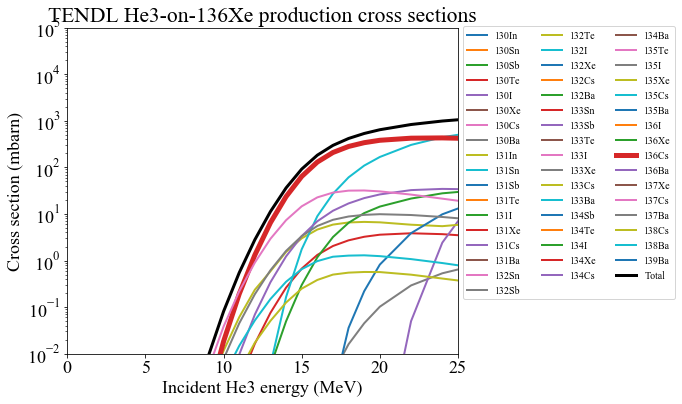

In [16]:
summed_data = np.zeros(54)

for isotope, data in he3_products_dict.items():
    if '136Cs' in isotope:
        linewidth=5
        xe136_pn = interp.interp1d(data[:,0],data[:,1])
    else:
        linewidth=2
    plt.plot(data[:,0],data[:,1],linewidth=linewidth,label=isotope)
    
    summed_data += data[:,1]
    
xe136_total_p = interp.interp1d(data[:,0],summed_data)
    
plt.plot(data[:,0],summed_data,'-k',linewidth=3,label='Total')
    

    
plt.ylim(0.01,1.e5)
plt.xlim(0.,25.)
plt.yscale('log')
plt.legend(ncol=3,fontsize=10,bbox_to_anchor=(1.,1.02),loc='upper left')
plt.title('TENDL He3-on-136Xe production cross sections')
plt.xlabel('Incident He3 energy (MeV)')
plt.ylabel('Cross section (mbarn)')
plt.savefig('plots/He3_production_cross_sections.png',dpi=200,bbox_inches='tight')


In [10]:
proton_products_dict = dict()
datadir = 'proton_bombardment_residual_products_Xe136/'
files = os.listdir(datadir)

for filename in files: 

    product_tag = filename.split('_')[0]
        
    this_xsec = np.genfromtxt(datadir+filename,skip_header=5)
    
    proton_products_dict[product_tag] = this_xsec





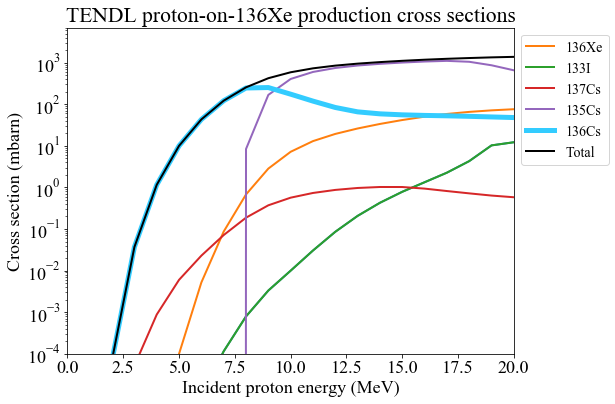

In [36]:
summed_data = np.zeros(54)

for isotope, data in proton_products_dict.items():
    xsec = interp.interp1d(data[:,0],data[:,1])
    
    
    
    if '136Cs' in isotope:
        linewidth=5
        xe136_ht = interp.interp1d(data[:,0],data[:,1])
    else:
        linewidth=2
      
    summed_data += data[:,1]
    if xsec(10.) > 1.e-4:
        plt.plot(data[:,0],data[:,1],linewidth=linewidth,label=isotope)
    
xe136_total_h = interp.interp1d(data[:,0],summed_data)
    
plt.plot(data[:,0],summed_data,'-k',linewidth=2,label='Total')
plt.ylim(0.0001,7.e3)
plt.xlim(0.,20.)
plt.yscale('log')
plt.legend(ncol=1,fontsize=14,bbox_to_anchor=(1.,1.),loc='upper left')
plt.title('TENDL proton-on-136Xe production cross sections')
plt.xlabel('Incident proton energy (MeV)')
plt.ylabel('Cross section (mbarn)')
plt.savefig('plots/proton_production_cross_sections.png',dpi=200,bbox_inches='tight')

In [12]:
datadir = 'xsec_data/'
proton_ta_reaction_dict = dict()


files = os.listdir(datadir)
for filename in files: 
    if 'Ta181' not in filename:
        continue
    else:
        reaction_tag = filename.split('_')[1]
        
    this_xsec = np.genfromtxt(datadir+filename,skip_header=5)
    
    proton_ta_reaction_dict[reaction_tag] = this_xsec

p1n
p1p
p1a
p2n
p1a1n


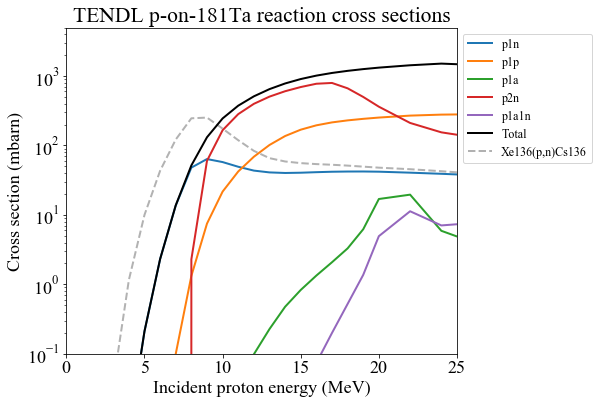

In [35]:
summed_data = np.zeros(54)

for isotope, data in proton_ta_reaction_dict.items():

    xsec = interp.interp1d(data[:,0],data[:,1])

    if 'x' in isotope or 'g' in isotope or 'pn'in isotope:
        continue
        
    if xsec(10.) > 1.e-5:
        print(isotope)
        plt.plot(data[:,0],data[:,1],linewidth=linewidth,label=isotope)
        #plt.plot(data[:,0],xsec(data[:,0]),linewidth=linewidth,label=isotope)
        #print(data[0:100,0])

        
    summed_data += data[:,1]
    
    

# for isotope, data in proton_products_dict.items():
#     xsec = interp.interp1d(data[:,0],data[:,1])
    
#     if '136Cs' in isotope:
#         linewidth=5
#         xe136_ht = interp.interp1d(data[:,0],data[:,1])
#         plt.plot(data[:,0],data[:,1],linewidth=linewidth,label=isotope)
    
    
    
ta181_total_h = interp.interp1d(data[:,0],summed_data)
    
plt.plot(data[:,0],summed_data,'-k',linewidth=2,label='Total')

plt.plot(data[:,0],xe136_ht(data[:,0]),'--',\
         linewidth=2,color=(0.,0.,0.,0.3),label='Xe136(p,n)Cs136')
plt.ylim(0.1,5.e3)
plt.xlim(0.,25.)
plt.yscale('log')
plt.legend(ncol=1,fontsize=12,bbox_to_anchor=(1.,1.),loc='upper left')
plt.title('TENDL p-on-181Ta reaction cross sections')
plt.xlabel('Incident proton energy (MeV)')
plt.ylabel('Cross section (mbarn)')
plt.savefig('plots/p_on_Ta_reaction_cross_sections.png',dpi=200,bbox_inches='tight')

139Ba


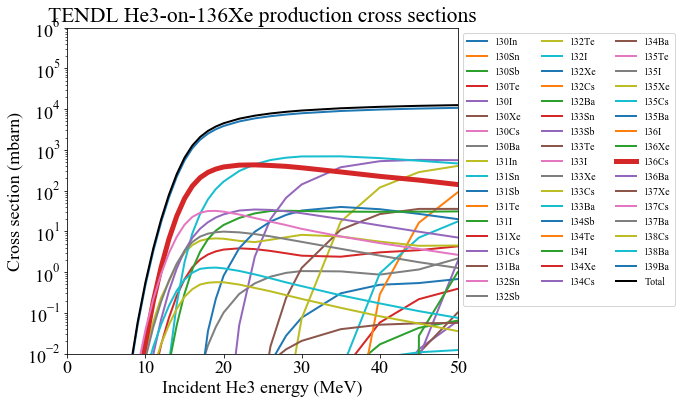

In [119]:
summed_data = np.zeros(54)

for isotope, data in he3_products_dict.items():
    if '136Cs' in isotope:
        linewidth=5
        xe136_ht = interp.interp1d(data[:,0],data[:,1])
    else:
        linewidth=2
        
    if data[40,1] > 1.e3:
        print(isotope)
      
    summed_data += data[:,1]
    
    plt.plot(data[:,0],data[:,1],linewidth=linewidth,label=isotope)
    
xe136_total_h = interp.interp1d(data[:,0],summed_data)
    
plt.plot(data[:,0],summed_data,'-k',linewidth=2,label='Total')
plt.ylim(0.01,1.e6)
plt.xlim(0.,50.)
plt.yscale('log')
plt.legend(ncol=3,fontsize=10,bbox_to_anchor=(1.,1.),loc='upper left')
plt.title('TENDL He3-on-136Xe production cross sections')
plt.xlabel('Incident He3 energy (MeV)')
plt.ylabel('Cross section (mbarn)')
plt.savefig('plots/he3_production_cross_sections.png',dpi=200,bbox_inches='tight')

In [107]:
print('Cross section at He3 = 25 MeV: {:4.4}'.format(xe136_total_h(25.)))
print('Cross section at p = 10 MeV: {:4.4}'.format(xe136_total_p(10.)))
print('Cross section at p = 5 MeV: {:4.4}'.format(xe136_total_p(5.)))
print('pn cross section at p = 10 MeV: {:4.4}'.format(xe136_pn(10.)))

Cross section at He3 = 25 MeV: 7.361e+03
Cross section at p = 10 MeV: 589.8
Cross section at p = 5 MeV: 10.02
pn cross section at p = 10 MeV: 174.9


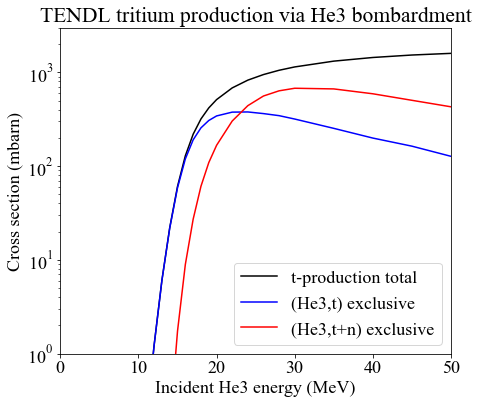

In [198]:
ht_xsec = np.genfromtxt('xsec_data/Xe136_ht_xsec.txt', skip_header=5)
htx_xsec = np.genfromtxt('xsec_data/Xe136_htx_xsec.txt',skip_header=5)
htn_xsec = np.genfromtxt('xsec_data/Xe136_htn_xsec.txt',skip_header=5)

plt.plot(htx_xsec[:,0],htx_xsec[:,1],'-k',label='t-production total')
plt.plot(ht_xsec[:,0],ht_xsec[:,1],'-b',label='(He3,t) exclusive')
plt.plot(htn_xsec[:,0],htn_xsec[:,1],'-r',label='(He3,t+n) exclusive')


plt.xlabel('Incident He3 energy (MeV)')
plt.ylabel('Cross section (mbarn)')
plt.xlim(0.,50.)
plt.legend()
plt.yscale('log')
plt.ylim(1,3.e3)
plt.title('TENDL tritium production via He3 bombardment')
plt.savefig('plots/tritium_production_cross_section_vs_energy_he3beam.png',dpi=200,bbox_inches='tight')


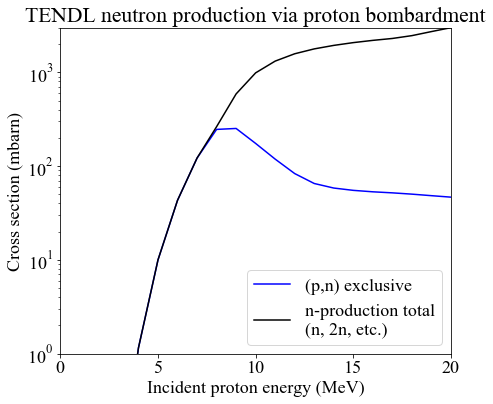

In [176]:
pn_xsec = np.genfromtxt('xsec_data/Xe136_pn_xsec.txt', skip_header=5)
pnx_xsec = np.genfromtxt('xsec_data/Xe136_pnx_xsec.txt',skip_header=5)

plt.plot(pn_xsec[:,0],pn_xsec[:,1],'-b',label='(p,n) exclusive')
plt.plot(pnx_xsec[:,0],pnx_xsec[:,1],'-k',label='n-production total\n(n, 2n, etc.)')

plt.xlabel('Incident proton energy (MeV)')
plt.ylabel('Cross section (mbarn)')
plt.xlim(0.,20.)
plt.legend()
plt.yscale('log')
plt.ylim(1,3.e3)
plt.title('TENDL neutron production via proton bombardment')
plt.savefig('plots/neutron_production_cross_section_vs_energy_protonbeam.png',dpi=200,bbox_inches='tight')


In [74]:
def he3_per_bunch( current, bunch_period ):
    e = 1.602176634e-19 # C / elementary charge
    Z = 2 # for He
    particles_per_bunch = current / e * bunch_period
    return particles_per_bunch

def p_per_bunch( current, bunch_period ):
    e = 1.602176634e-19 # C / elementary charge
    Z = 1 # for He
    particles_per_bunch = current / e * bunch_period
    return particles_per_bunch
    
    

In [75]:
he3_per_bunch(50e-9,3.2e-6)

998641.451913722

# Calculating interaction rates

In [124]:
beam_current = 50e-9 # Amps
bunch_period = 3.2e-6 # seconds


P = 1. # bar
R = 8.31e-2 # L*bar/(mol*K)
T = 295 # K
M_A = 136 # g/mol
cm3_per_L = 1000
cell_diameter = 1 * 2.54 # cm


gas_xenon_density = P/(R*T) * 6.02e23 / cm3_per_L # atoms per cm^3


print('Cross section: {:4.4} mbarn'.format(xe136_total_h(25.)))
print('Gas density at P = {:2.2} bar: {:3.3} atoms/cm^3\n\n'.format(P,gas_xenon_density))

he3_interactions_per_bunch = xe136_total_h(25.) * 1e-27 * \
                            cell_diameter * \
                            gas_xenon_density * \
                            he3_per_bunch(beam_current,bunch_period)

he3_t_interactions_per_bunch = xe136_ht(25.) * 1e-27 * \
                            cell_diameter * \
                            gas_xenon_density * \
                            he3_per_bunch(beam_current,bunch_period)

p_interactions_per_bunch = xe136_total_p(10.) * 1e-27 * \
                            cell_diameter * \
                            gas_xenon_density * \
                            he3_per_bunch(beam_current,bunch_period)
p_n_interactions_per_bunch = xe136_pn(10.) * 1e-27 * \
                            cell_diameter * \
                            gas_xenon_density * \
                            he3_per_bunch(beam_current,bunch_period)


print('He3 interactions per bunch at 25 MeV: {:4.4}'.format(he3_interactions_per_bunch))
print('He3,t reactions per bunch at 25 MeV: {:4.4}\n\n'.format(he3_t_interactions_per_bunch))

print('proton interactions per bunch at 10 MeV: {:4.4}'.format(p_interactions_per_bunch))
print('p,n interactions per bunch at 10 MeV: {:4.4}\n\n'.format(p_n_interactions_per_bunch))

p_interactions_per_bunch = xe136_total_p(7.) * 1e-27 * \
                            cell_diameter * \
                            gas_xenon_density * \
                            he3_per_bunch(beam_current,bunch_period)
p_n_interactions_per_bunch = xe136_pn(7.) * 1e-27 * \
                            cell_diameter * \
                            gas_xenon_density * \
                            he3_per_bunch(beam_current,bunch_period)
print('proton interactions per bunch at 7 MeV: {:4.4}'.format(p_interactions_per_bunch))
print('p,n interactions per bunch at 7 MeV: {:4.4}\n\n'.format(p_n_interactions_per_bunch))

p_interactions_per_bunch = xe136_total_p(5.) * 1e-27 * \
                            cell_diameter * \
                            gas_xenon_density * \
                            he3_per_bunch(beam_current,bunch_period)
p_n_interactions_per_bunch = xe136_pn(5.) * 1e-27 * \
                            cell_diameter * \
                            gas_xenon_density * \
                            he3_per_bunch(beam_current,bunch_period)
print('proton interactions per bunch at 5 MeV: {:4.4}'.format(p_interactions_per_bunch))
print('p,n interactions per bunch at 5 MeV: {:4.4}\n\n'.format(p_n_interactions_per_bunch))





Cross section: 7.361e+03 mbarn
Gas density at P = 1.0 bar: 2.46e+19 atoms/cm^3


He3 interactions per bunch at 25 MeV: 458.5
He3,t reactions per bunch at 25 MeV: 26.25


proton interactions per bunch at 10 MeV: 36.74
p,n interactions per bunch at 10 MeV: 10.89


proton interactions per bunch at 7 MeV: 7.602
p,n interactions per bunch at 7 MeV: 7.592


proton interactions per bunch at 5 MeV: 0.6241
p,n interactions per bunch at 5 MeV: 0.6237




In [159]:
print(xe136_total_p(7))
print(xe136_pn(7))

122.04161714150375
121.883


# TOF vs. Energy

In [142]:
def TOF_vs_energy( energy ):
    distance = 13. # m
    c = 3e8 # m/s
    m_N = 939.56563 # MeV
    
    TOF = distance / ( c*np.sqrt( 1 - ( 1 / (energy/m_N + 1) )**2  ) )
    
    return TOF

def Energy_vs_TOF( TOF ):
    distance = 13. # m
    c = 3e8 # m/s
    m_N = 939.56563 # MeV
    
    energy = m_N * ( 1 / np.sqrt(1-(distance/TOF/c)**2) - 1 )
    
    return energy

TOF at 5 MeV: 421.7 ns
TOF at 10 MeV: 299.4 ns
Energy uncertainty at 10 MeV, given 3ns timing uncertainty: 133.5 keV
Energy uncertainty at 5 MeV, given 3ns timing uncertainty: 47.37 keV


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


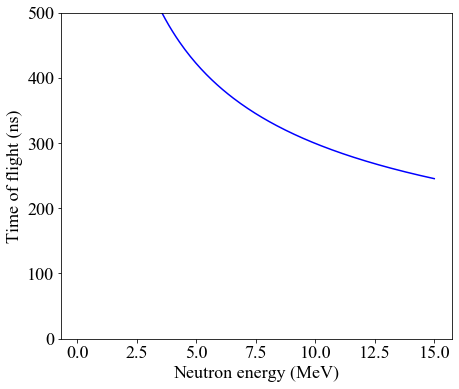

In [153]:
energy = np.linspace(0.,15.,200)

plt.plot(energy,TOF_vs_energy(energy)*1e9,'-b')

plt.xlabel('Neutron energy (MeV)')
plt.ylabel('Time of flight (ns)')
plt.ylim(0.,500.)

print('TOF at 5 MeV: {:4.4} ns'.format(TOF_vs_energy(5.)*1e9))
print('TOF at 10 MeV: {:4.4} ns'.format(TOF_vs_energy(10.)*1e9))

print('Energy uncertainty at 10 MeV, given 3ns timing uncertainty: {:4.4} keV'.format(\
                                np.abs(Energy_vs_TOF(302e-9)-Energy_vs_TOF(300e-9))*1000))

print('Energy uncertainty at 5 MeV, given 3ns timing uncertainty: {:4.4} keV'.format(\
                                np.abs(Energy_vs_TOF(424e-9)-Energy_vs_TOF(422e-9))*1000))



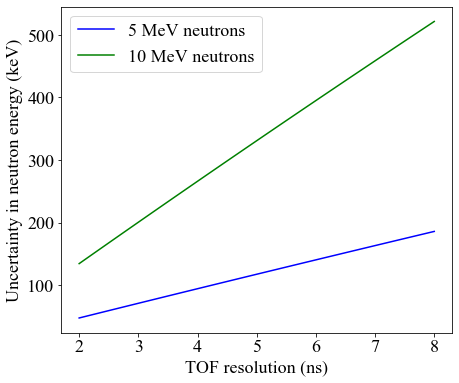

In [157]:
uncertainty_5MeV = np.zeros(100)
uncertainty_10MeV = np.zeros(100)
res = np.linspace(2.,8.,100)

for i in range(100):
    
    uncertainty_5MeV[i] = np.abs( Energy_vs_TOF( TOF_vs_energy(5.) + res[i]*1.e-9 ) - \
                              Energy_vs_TOF( TOF_vs_energy(5.) ) )*1000
        
    uncertainty_10MeV[i] = np.abs( Energy_vs_TOF( TOF_vs_energy(10.) + res[i]*1.e-9 ) - \
                              Energy_vs_TOF( TOF_vs_energy(10.) ) )*1000
    
    
plt.plot(res,uncertainty_5MeV,'-b',label='5 MeV neutrons')
plt.plot(res,uncertainty_10MeV,'-g',label='10 MeV neutrons')

plt.xlabel('TOF resolution (ns)')
plt.ylabel('Uncertainty in neutron energy (keV)')
plt.legend()
plt.savefig('plots/neutron_energy_resolution_vs_TOF_resolution.png',dpi=200,bbox_inches='tight')

# Energy loss in target

In [180]:
transmission_5MeV_protons = np.genfromtxt('target_energy_loss/Transmitted_ions_5MeVProtons_on_Havar.txt',\
                                         skip_header=13,skip_footer=12000)
transmission_10MeV_protons = np.genfromtxt('target_energy_loss/Transmitted_ions_10MeVProtons_on_Havar.txt',\
                                          skip_header=13,skip_footer=12000)

transmission_25MeV_he3 = np.genfromtxt("target_energy_loss/Transmitted_ions_25MeVHe3_on_Havar.txt",\
                                      skip_header=13,skip_footer=12000)






In [188]:
import histlite as hl
import scipy.optimize as opt

def Gaussian(x,A,mu,sig):
    return A*np.exp( -(x-mu)**2/(2*sig**2) )



In [189]:
h_transmission_5MeVprotons = hl.hist(transmission_5MeV_protons[:,3]/1.e3,bins=np.linspace(4.8e3,5.0e3,200))

energy_spread_std = np.std(transmission_5MeV_protons[:,3]/1.e3)

bin_width = (h_transmission_5MeVprotons.bins[0][1]-h_transmission_5MeVprotons.bins[0][0])
bin_centers = h_transmission_5MeVprotons.bins[0][0:-1] + bin_width/2.

popt,pcov = opt.curve_fit(Gaussian,bin_centers,h_transmission_5MeVprotons.values,p0=(250.,4925,20))

print('RMS energy width: {:4.4} keV'.format(energy_spread_std))






RMS energy width: 11.63 keV


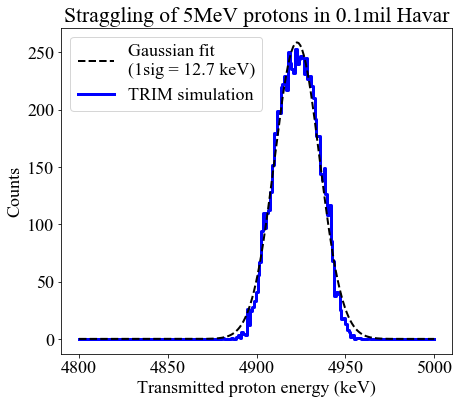

In [193]:
xfit = np.linspace(4800,5000,200)
yfit = Gaussian(xfit,popt[0],popt[1],popt[2])

hl.plot1d(h_transmission_5MeVprotons,color='b',linewidth=3,label='TRIM simulation')
plt.plot(xfit,yfit,'--k',linewidth=2,label='Gaussian fit\n(1sig = {:3.3} keV)'.format(popt[2]))

plt.xlabel('Transmitted proton energy (keV)')
plt.ylabel('Counts')
plt.title('Straggling of 5MeV protons in 0.1mil Havar')
plt.legend()
plt.savefig('plots/straggling_5MeV_protons_in_Havar.png',dpi=300,bbox_inches='tight')




RMS energy width: 11.05 keV


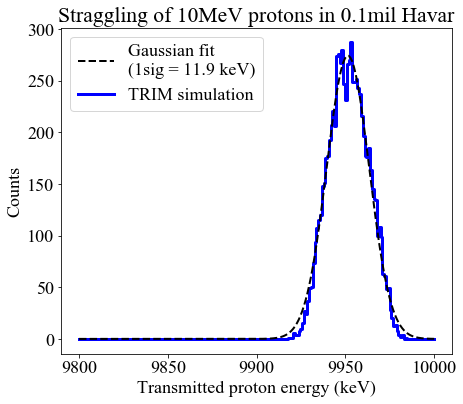

In [195]:
h_transmission_10MeVprotons = hl.hist(transmission_10MeV_protons[:,3]/1.e3,bins=np.linspace(9.8e3,10.0e3,200))

energy_spread_std = np.std(transmission_10MeV_protons[:,3]/1.e3)

bin_width = (h_transmission_10MeVprotons.bins[0][1]-h_transmission_10MeVprotons.bins[0][0])
bin_centers = h_transmission_10MeVprotons.bins[0][0:-1] + bin_width/2.

popt,pcov = opt.curve_fit(Gaussian,bin_centers,h_transmission_10MeVprotons.values,p0=(250.,9925,20))

print('RMS energy width: {:4.4} keV'.format(energy_spread_std))


xfit = np.linspace(9800,10000,200)
yfit = Gaussian(xfit,popt[0],popt[1],popt[2])

hl.plot1d(h_transmission_10MeVprotons,color='b',linewidth=3,label='TRIM simulation')
plt.plot(xfit,yfit,'--k',linewidth=2,label='Gaussian fit\n(1sig = {:3.3} keV)'.format(popt[2]))

plt.xlabel('Transmitted proton energy (keV)')
plt.ylabel('Counts')
plt.title('Straggling of 10MeV protons in 0.1mil Havar')
plt.legend()
plt.savefig('plots/straggling_10MeV_protons_in_Havar.png',dpi=300,bbox_inches='tight')






RMS energy width: 23.54 keV


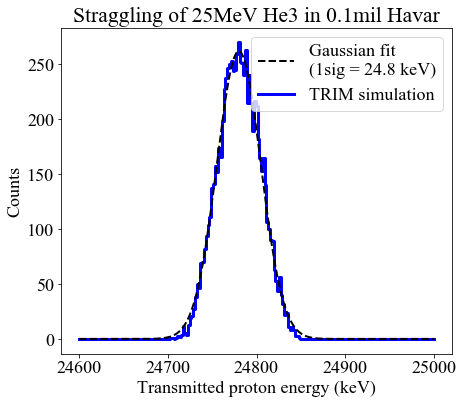

In [197]:
 h_transmission_25MeV_he3 = hl.hist(transmission_25MeV_he3[:,3]/1.e3,bins=np.linspace(24.6e3,25.0e3,200))

energy_spread_std = np.std(transmission_25MeV_he3[:,3]/1.e3)

bin_width = (h_transmission_25MeV_he3.bins[0][1]-h_transmission_25MeV_he3.bins[0][0])
bin_centers = h_transmission_25MeV_he3.bins[0][0:-1] + bin_width/2.

popt,pcov = opt.curve_fit(Gaussian,bin_centers,h_transmission_25MeV_he3.values,p0=(250.,24825,20))

print('RMS energy width: {:4.4} keV'.format(energy_spread_std))


xfit = np.linspace(24600,25000,200)
yfit = Gaussian(xfit,popt[0],popt[1],popt[2])

hl.plot1d(h_transmission_25MeV_he3,color='b',linewidth=3,label='TRIM simulation')
plt.plot(xfit,yfit,'--k',linewidth=2,label='Gaussian fit\n(1sig = {:3.3} keV)'.format(popt[2]))

plt.xlabel('Transmitted proton energy (keV)')
plt.ylabel('Counts')
plt.title('Straggling of 25MeV He3 in 0.1mil Havar')
plt.legend()
plt.savefig('plots/straggling_25MeV_he3_in_Havar.png',dpi=300,bbox_inches='tight')



